In [151]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import urllib.request
from io import BytesIO
import tensorflow as tf

In [27]:
url = str(
    'https://chupanhsukien.info/wp-content/uploads/2016/02/To-chuc-nhan-su-mat-rong.jpg')
with urllib.request.urlopen(url) as url:
    f = BytesIO(url.read())

In [28]:
with open("./img1.jpg", 'rb') as file:
    f = BytesIO(file.read())

In [29]:
X = np.array(Image.open(f))

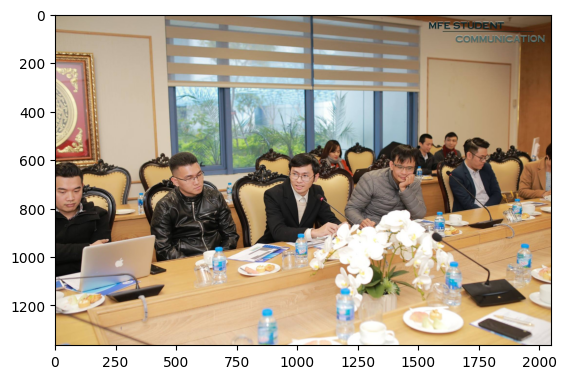

In [30]:
plt.imshow(X)

In [31]:
X.shape

(1365, 2048, 3)

In [32]:
X[:,:,0]

array([[172, 172, 172, ..., 100, 100, 100],
       [173, 173, 173, ..., 100, 100, 100],
       [173, 173, 173, ..., 100, 100, 100],
       ...,
       [216, 216, 216, ..., 224, 224, 224],
       [216, 216, 216, ..., 224, 224, 224],
       [216, 216, 216, ..., 224, 224, 224]], dtype=uint8)

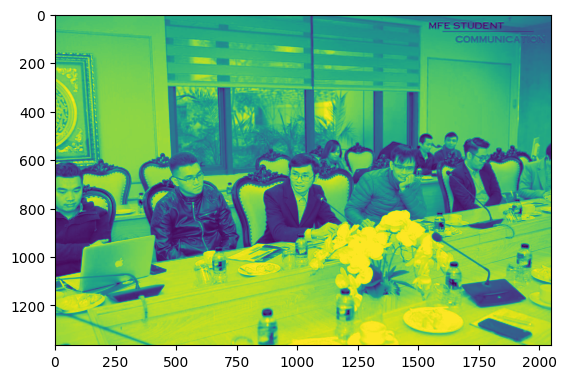

In [33]:
plt.imshow(X[:,:,0])

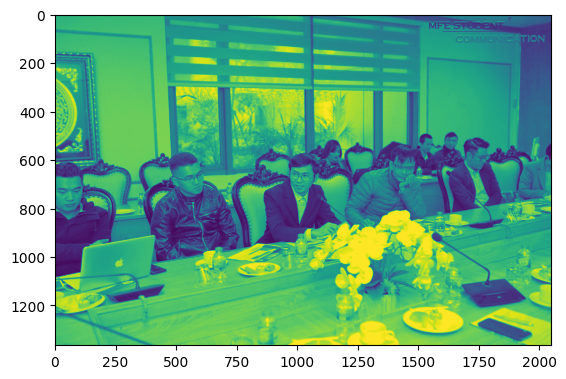

In [34]:
plt.imshow(X[:,:,1])

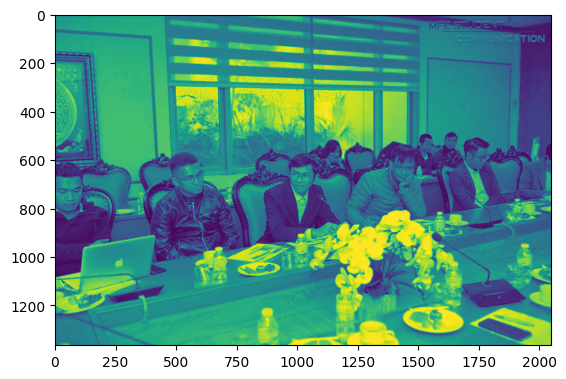

In [35]:
plt.imshow(X[:,:,2])

In [36]:
X = X.dot([0.299, 0.5870, 0.144])

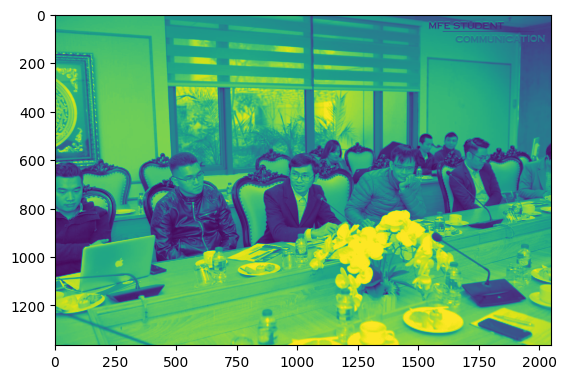

In [37]:
plt.imshow(X)

In [49]:
def convolution(X, F, s=1, p_row=0, p_col=0):
    assert len(X.shape) == len(
        F.shape), "X and F must have the same number of dimensions."

    X_padded = np.zeros(
        (X.shape[0] + 2*p_row, X.shape[1] + 2*p_col) + X.shape[2:])

    X_padded[p_row:X_padded.shape[0]-p_row, p_col:X_padded.shape[1]-p_col] = X

    output_row = int((X.shape[0] + 2*p_row - F.shape[0]) / s) + 1
    output_col = int((X.shape[1] + 2*p_col - F.shape[1]) / s) + 1

    # assert output_row == int(output_row) and output_col == int(
    #     output_col), "Padding is invalid."

    output = np.zeros((int(output_row), int(output_col)))

    start_row = 0
    output_row = 0
    while start_row + F.shape[0] <= X_padded.shape[0] and output_row < output.shape[0]:
        start_col = 0
        output_col = 0
        while start_col + F.shape[1] <= X_padded.shape[1] and output_col < output.shape[1]:
            o = X_padded[start_row:start_row + F.shape[0],
                         start_col:start_col + F.shape[1]] * F
            result = np.sum(o)
            output[output_row][output_col] = result
            start_col += s
            output_col += 1

        start_row += s
        output_row += 1

    return output

In [128]:
def pooling(X, size, operator=np.max, s=1):
    assert len(size) == 2, "size must be 2 dimensional"

    output_row = int((X.shape[0] - size[0]) / s) + 1
    output_col = int((X.shape[1] - size[1]) / s) + 1

    output = np.zeros((int(output_row), int(output_col)) + X.shape[2:])

    start_row = 0
    output_row = 0
    while start_row + size[0] <= X.shape[0] and output_row < output.shape[0]:
        start_col = 0
        output_col = 0
        while start_col + size[1] <= X.shape[1] and output_col < output.shape[1]:
            o = operator(X[start_row:start_row + size[0],
                         start_col:start_col + size[1]], axis=(0, 1))
            output[output_row][output_col] = o
            start_col += s
            output_col += 1

        start_row += s
        output_row += 1

    return output

In [51]:
F1 = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

In [52]:
Y1 = convolution(X, F1)

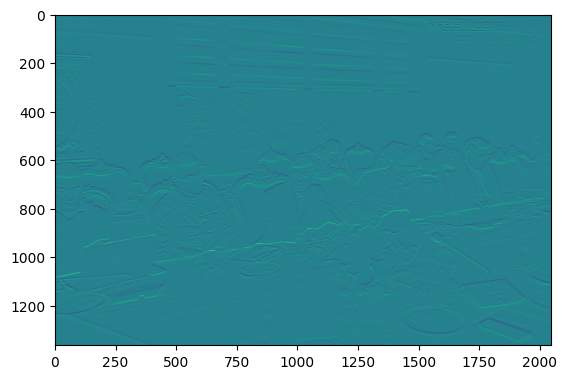

In [53]:
plt.imshow(Y1)

In [55]:
F2 = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1],
])

In [56]:
Y2 = convolution(X, F2, s=3)

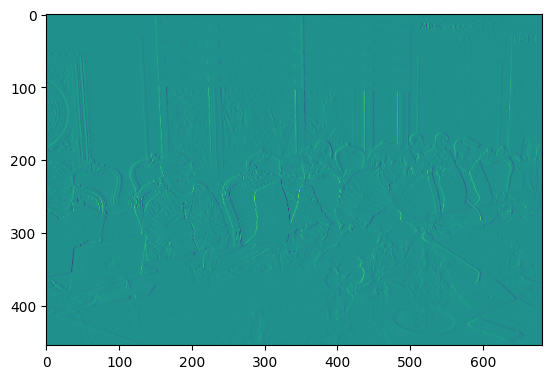

In [57]:
plt.imshow(Y2)

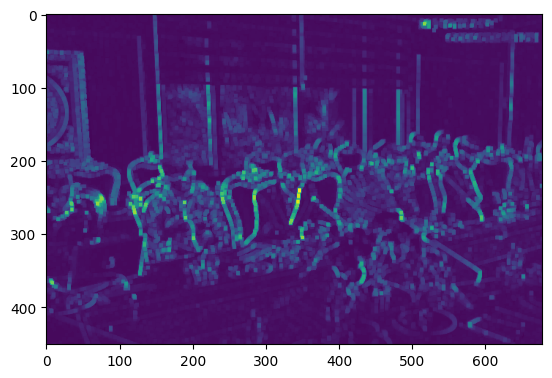

In [150]:
plt.imshow(pooling(Y2, size=(5, 5)))

In [152]:
A = np.random.randint(low=1, high=10, size=(5, 5, 3))

In [153]:
A

array([[[8, 3, 4],
        [6, 3, 9],
        [3, 9, 4],
        [1, 9, 2],
        [8, 8, 9]],

       [[2, 1, 5],
        [9, 9, 9],
        [8, 4, 5],
        [3, 2, 9],
        [4, 5, 9]],

       [[2, 6, 4],
        [3, 7, 8],
        [9, 4, 1],
        [9, 3, 2],
        [6, 8, 3]],

       [[9, 3, 7],
        [4, 3, 3],
        [8, 7, 4],
        [2, 7, 3],
        [6, 3, 3]],

       [[8, 4, 8],
        [9, 2, 3],
        [1, 5, 7],
        [2, 3, 7],
        [3, 6, 2]]])

In [164]:
A.flatten()

array([8, 3, 4, 6, 3, 9, 3, 9, 4, 1, 9, 2, 8, 8, 9, 2, 1, 5, 9, 9, 9, 8,
       4, 5, 3, 2, 9, 4, 5, 9, 2, 6, 4, 3, 7, 8, 9, 4, 1, 9, 3, 2, 6, 8,
       3, 9, 3, 7, 4, 3, 3, 8, 7, 4, 2, 7, 3, 6, 3, 3, 8, 4, 8, 9, 2, 3,
       1, 5, 7, 2, 3, 7, 3, 6, 2])

In [165]:
A

array([[[8, 3, 4],
        [6, 3, 9],
        [3, 9, 4],
        [1, 9, 2],
        [8, 8, 9]],

       [[2, 1, 5],
        [9, 9, 9],
        [8, 4, 5],
        [3, 2, 9],
        [4, 5, 9]],

       [[2, 6, 4],
        [3, 7, 8],
        [9, 4, 1],
        [9, 3, 2],
        [6, 8, 3]],

       [[9, 3, 7],
        [4, 3, 3],
        [8, 7, 4],
        [2, 7, 3],
        [6, 3, 3]],

       [[8, 4, 8],
        [9, 2, 3],
        [1, 5, 7],
        [2, 3, 7],
        [3, 6, 2]]])

In [167]:
A.flatten().reshape(A.shape) == A

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]]])

: 

In [154]:
tensor_3d = tf.constant(A)

In [155]:
tensor_3d

<tf.Tensor: shape=(5, 5, 3), dtype=int32, numpy=
array([[[8, 3, 4],
        [6, 3, 9],
        [3, 9, 4],
        [1, 9, 2],
        [8, 8, 9]],

       [[2, 1, 5],
        [9, 9, 9],
        [8, 4, 5],
        [3, 2, 9],
        [4, 5, 9]],

       [[2, 6, 4],
        [3, 7, 8],
        [9, 4, 1],
        [9, 3, 2],
        [6, 8, 3]],

       [[9, 3, 7],
        [4, 3, 3],
        [8, 7, 4],
        [2, 7, 3],
        [6, 3, 3]],

       [[8, 4, 8],
        [9, 2, 3],
        [1, 5, 7],
        [2, 3, 7],
        [3, 6, 2]]])>

In [157]:
layer = tf.keras.layers.Flatten()

In [161]:
flatten = layer(layer(tensor_3d))

In [163]:
flatten.numpy().flatten()

array([8, 3, 4, 6, 3, 9, 3, 9, 4, 1, 9, 2, 8, 8, 9, 2, 1, 5, 9, 9, 9, 8,
       4, 5, 3, 2, 9, 4, 5, 9, 2, 6, 4, 3, 7, 8, 9, 4, 1, 9, 3, 2, 6, 8,
       3, 9, 3, 7, 4, 3, 3, 8, 7, 4, 2, 7, 3, 6, 3, 3, 8, 4, 8, 9, 2, 3,
       1, 5, 7, 2, 3, 7, 3, 6, 2])